In [ ]:
pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512573 sha256=c4d02952ba00bc31ef488afcc5f856c0da68a7989c0870f06f39bb58df3222fa
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from fastdtw import fastdtw
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose


ModuleNotFoundError: ignored

# Análisis de datos EGG - Individual

## 1 Lectura de Datos EGG
Se realiza la lectura de los archivos de datos correspondientes a cada condición por sesión, datos de registro en silencio y datos de registro con música binaural o ambiental.

### 1.1 Lectura de datos EEG

#### 1.1.1 Seleccion de Participante

In [ ]:
usuario='viviana_bautista'
silencio = '1-silencio-mindMonitor_2023-12-23--23-35-58_7887383578900934829.csv'
alfa = '2-alfa-mindMonitor_2023-12-23--23-48-27_8826272457505633613.csv'
ambiental = '3-ambiental-mindMonitor_2023-12-23--23-59-05_2720800487781323212.csv'

#### 1.1.2 Codigos de Lecturas

In [ ]:
workdir = '/content/drive/MyDrive/LAYDI VIVIANA/LAYDIHACKS/[Estudios] Master en Análisis de Datos/TFM/Muse/datos/EEG/'


# Lee el archivo CSV con los datos
def read_filename(filename, date = '2023-12-23'):
  abs_filename=workdir+usuario+'/'+filename
  df = pd.read_csv(abs_filename)
  # Convierte la columna 'TimeStamp' a formato datetime
  df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
  # Establecer la columna 'TimeStamp' desde la fecha '2023-12-23' y el minuto 0
  start_date = pd.Timestamp(date)
  df['TimeStamp'] = df['TimeStamp'] - df['TimeStamp'].min() + start_date


  del df['AUX_RIGHT']
  del df['RAW_TP9']
  del df['RAW_AF7']
  del df['RAW_AF8']
  del df['RAW_TP10']
  del df['Accelerometer_X']
  del df['Accelerometer_Y']
  del df['Accelerometer_Z']
  del df['Gyro_X']
  del df['Gyro_Y']
  del df['Gyro_Z']
  del df['HeadBandOn']
  del df['HSI_TP9']
  del df['HSI_AF7']
  del df['HSI_AF8']
  del df['HSI_TP10']
  del df['Delta_TP9']
  del df['Delta_AF7']
  del df['Delta_AF8']
  del df['Delta_TP10']
  del df['Gamma_TP9']
  del df['Gamma_AF7']
  del df['Gamma_AF8']
  del df['Gamma_TP10']
  del df['Battery']
  del df['Theta_TP9']
  del df['Theta_TP10']
  del df['Alpha_TP9']
  del df['Alpha_TP10']
  del df['Beta_TP9']
  del df['Beta_TP10']

  # Establece la fecha y hora límite
  fecha_limite = pd.Timestamp('2023-12-23 00:08:00.000')

  # Filtrar para eliminar el primer minuto de datos
  df_filtrado = df[df['TimeStamp'].dt.minute != 0]

  # Filtra el DataFrame para incluir solo datos hasta la fecha límite
  df_hasta_limite = df_filtrado[df_filtrado['TimeStamp'] <= fecha_limite]
  # Establecer la columna 'TimeStamp' como el índice
  df_hasta_limite.set_index('TimeStamp', inplace=True, drop=False)
  # Realiza un resampleo para que los datos esten por segundo.
  df_amb_resample = df_hasta_limite.resample('1S', on='TimeStamp').mean()
  # Resampleo a una frecuencia por segundo y rellenado hacia adelante (forward fill)
  df_amb_resample_sec = df_amb_resample.resample('S').asfreq()

  return df_amb_resample


In [ ]:
df_silencio = read_filename(silencio)
df_alfa = read_filename(alfa)
df_amb = read_filename(ambiental)

<ipython-input-329-eb1a1f34bf63>:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_amb_resample = df_hasta_limite.resample('1S', on='TimeStamp').mean()
<ipython-input-329-eb1a1f34bf63>:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_amb_resample = df_hasta_limite.resample('1S', on='TimeStamp').mean()
<ipython-input-329-eb1a1f34bf63>:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_amb_resample = df_hasta_l

In [ ]:
dfs = [df_silencio, df_alfa, df_amb]
dfs_labels = ['Silencio', 'Binaural Alfa', 'Ambiental']

In [ ]:
# Seleccionar las bandas a gráficas
band_columns = [ 'Theta', 'Alpha', 'Beta']
canales =  [ 'AF7', 'AF8']

In [ ]:
for i, df in enumerate(dfs):
  print(f"ondas del registro {dfs_labels[i]}: {df.columns}")

ondas del registro Silencio: Index(['Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7',
       'Beta_AF8', 'Alpha'],
      dtype='object')
ondas del registro Binaural Alfa: Index(['Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7',
       'Beta_AF8', 'Alpha'],
      dtype='object')
ondas del registro Ambiental: Index(['Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7',
       'Beta_AF8', 'Alpha'],
      dtype='object')


In [ ]:
# Crear Array de las bandas a trabajar
bands = []
for wave in band_columns:
  for canal in canales:
    bands.append(f'{wave}_{canal}')
print(bands)

['Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7', 'Beta_AF8']


### 1.2 Preprocesamiento de Datos




In [ ]:
for df in dfs:
  # Generar un valor promedio de la potencia con todos los canales por banda
  for wave in band_columns:
    df[wave] = 0
    for canal in canales:
      df[wave] += df[f'{wave}_{canal}']
      df[wave] = df[wave]/len(canales)

In [ ]:
# Validación de datos Nulos
for i, df in enumerate(dfs):
  for banda in band_columns:
    print(f"- Audio {dfs_labels[i]}. Onda {banda} ")
    df[banda] = df[banda].fillna(method='bfill')
    print(f"   valores nulos {df[banda].isna().sum()}")

- Audio Silencio. Onda Theta 
   valores nulos 0
- Audio Silencio. Onda Alpha 
   valores nulos 0
- Audio Silencio. Onda Beta 
   valores nulos 0
- Audio Binaural Alfa. Onda Theta 
   valores nulos 0
- Audio Binaural Alfa. Onda Alpha 
   valores nulos 0
- Audio Binaural Alfa. Onda Beta 
   valores nulos 0
- Audio Ambiental. Onda Theta 
   valores nulos 0
- Audio Ambiental. Onda Alpha 
   valores nulos 0
- Audio Ambiental. Onda Beta 
   valores nulos 0


## 2 Análisis Exploratorio

### Descripción de Datos

In [ ]:
for i, df in enumerate(dfs):
  print("----------------------------------------------------------------------")
  print(f"Audio {dfs_labels[i]}----------------------------")
  print(df.describe())

----------------------------------------------------------------------
Audio Silencio----------------------------
        Theta_AF7   Theta_AF8   Alpha_AF7   Alpha_AF8    Beta_AF7    Beta_AF8  \
count  411.000000  411.000000  411.000000  411.000000  411.000000  411.000000   
mean    -0.004285   -0.090035    0.115965    0.095953   -0.079638   -0.109813   
std      0.278373    0.213113    0.179313    0.159475    0.092029    0.086499   
min     -0.587771   -0.575824   -0.253853   -0.375509   -0.360230   -0.386861   
25%     -0.200863   -0.241563   -0.008894   -0.005745   -0.139911   -0.167533   
50%     -0.058565   -0.103188    0.104645    0.087590   -0.084365   -0.114493   
75%      0.162874    0.050402    0.220961    0.189766   -0.022149   -0.054910   
max      0.849794    0.787021    1.368576    0.776905    0.365115    0.203471   

            Alpha       Theta        Beta  
count  420.000000  420.000000  420.000000  
mean     0.077087   -0.047623   -0.075164  
std      0.099333    0.1

### QQ plot

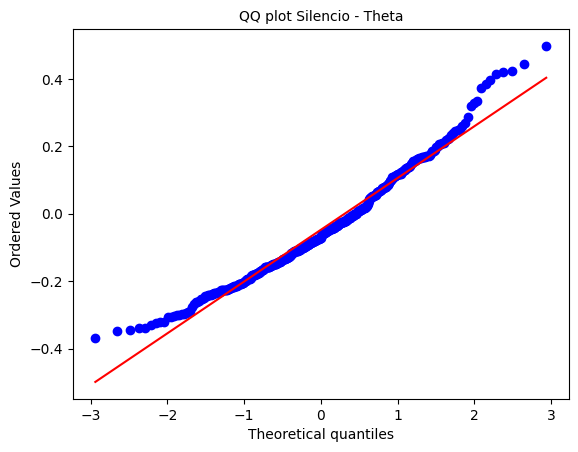

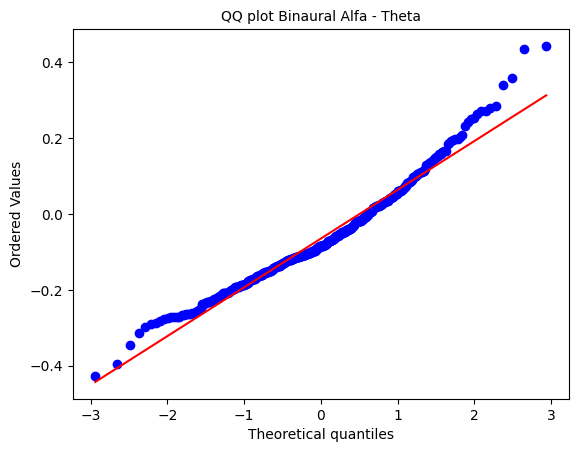

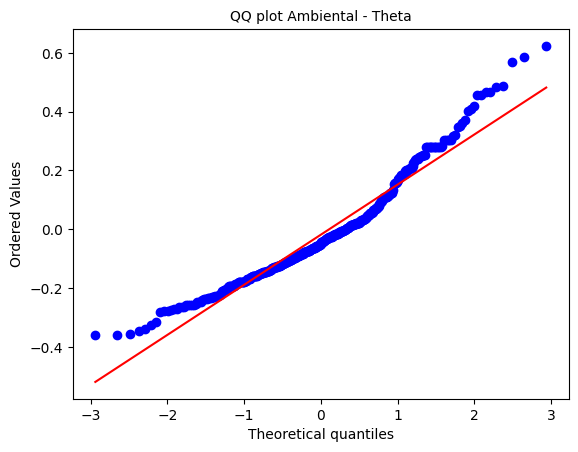

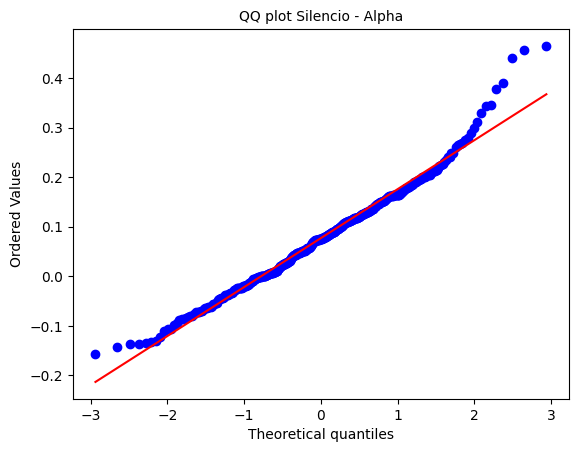

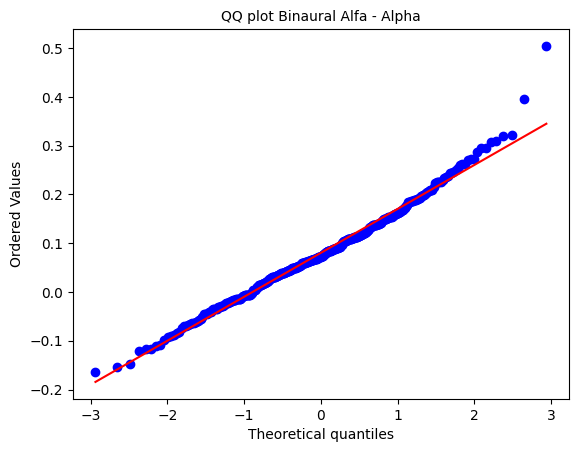

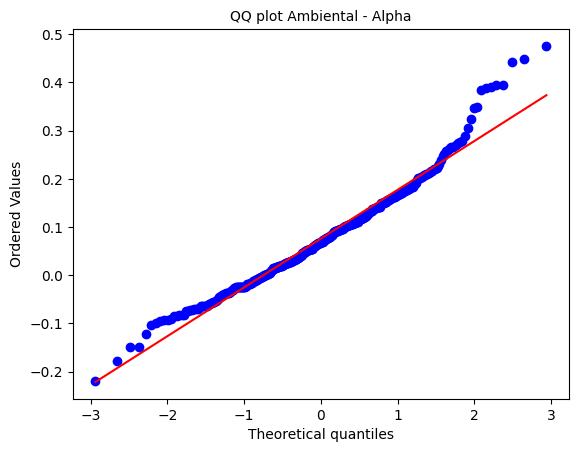

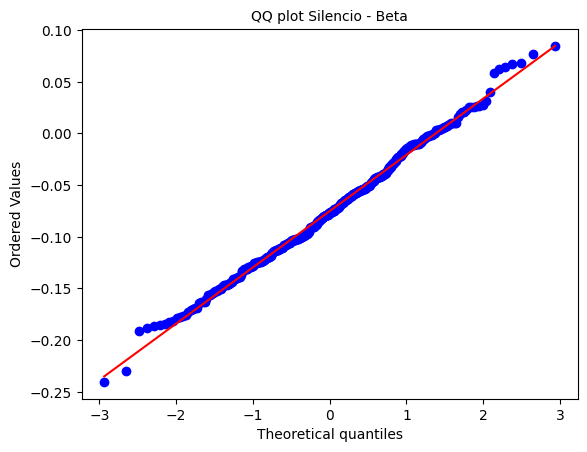

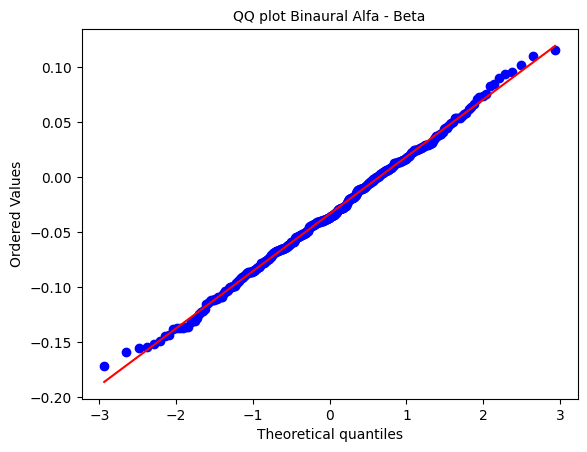

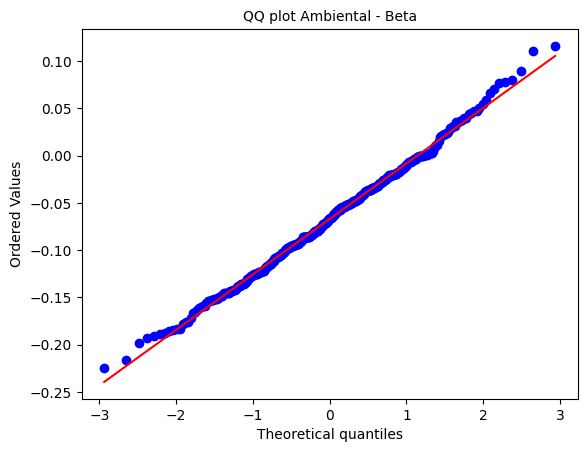

In [ ]:
import scipy.stats
for banda in band_columns:
  for i, df in enumerate(dfs):
    scipy.stats.probplot(df[banda], plot=plt)
    plt.title(f"QQ plot {dfs_labels[i]} - {banda}", size=10)
    plt.show()

### Estacionaria
Prueba Dickey-Fuller. Ho: Serie No Estacionaria.
Si rechazamos Ho, la serie es estacionaria


In [ ]:
valor_estadistico = -5.3841
valor_critico = -3.4462
if (valor_estadistico < valor_critico):
  print("Rechazamos - Serie Estacionaria")
else:
  print("No Rechazamos - Serie NO Estacionaria")

Rechazamos - Serie Estacionaria


In [ ]:
sts.adfuller(df['Alpha'])

(-5.384192829237415,
 3.6559986555877283e-06,
 5,
 414,
 {'1%': -3.4462444670071046,
  '5%': -2.8685466682709975,
  '10%': -2.5705023309762187},
 -816.3631207630376)

## 3 Visualización de datos EGG

### Graficas de Datasets por Ondas

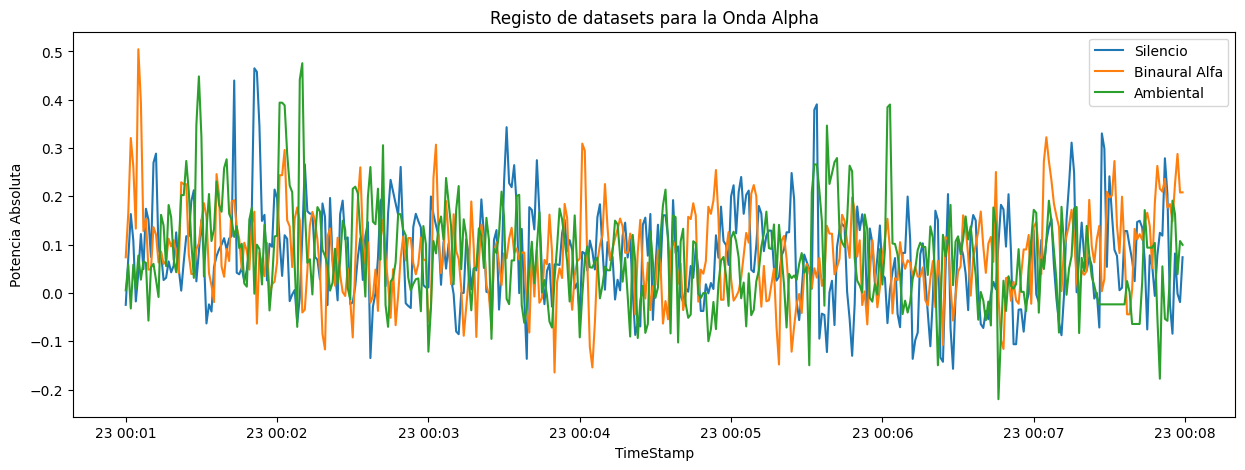

In [ ]:
band_columns = [ 'Theta', 'Alpha', 'Beta']
band_columns = [ 'Alpha']
# Graficar las columnas 'alpha' de cada DataFrame
for wave in band_columns:
  plt.figure(figsize=(15, 5))
  for i, df in enumerate(dfs):
    plt.plot(df.index, df[wave], label=dfs_labels[i])

  # Configuración de la gráfica
  plt.title('Registo de datasets para la Onda ' + wave)
  plt.xlabel('TimeStamp')
  plt.ylabel('Potencia Absoluta')
  plt.legend()

  # Mostrar la gráfica
  plt.show()

### Grafica de Ondas por Dataset

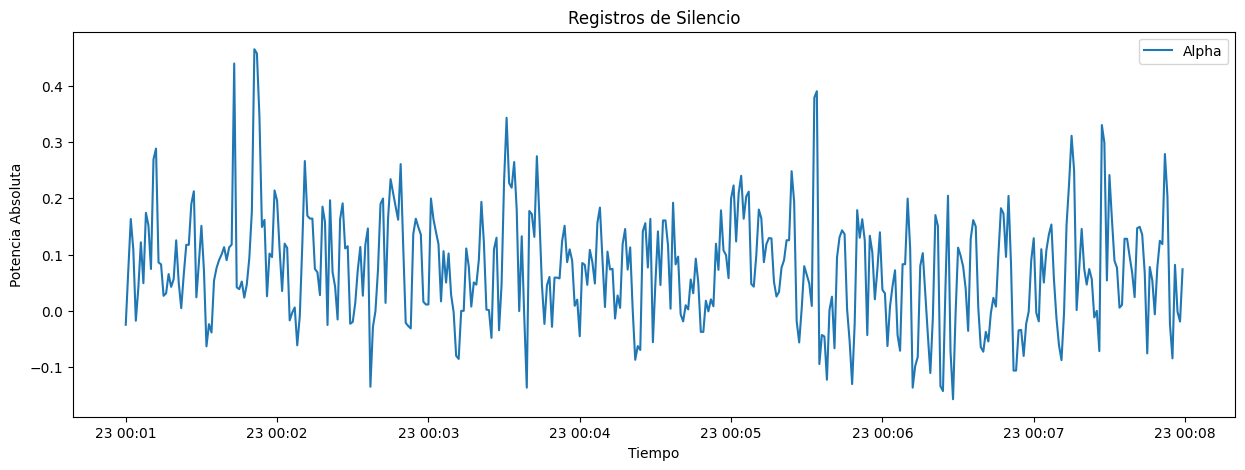

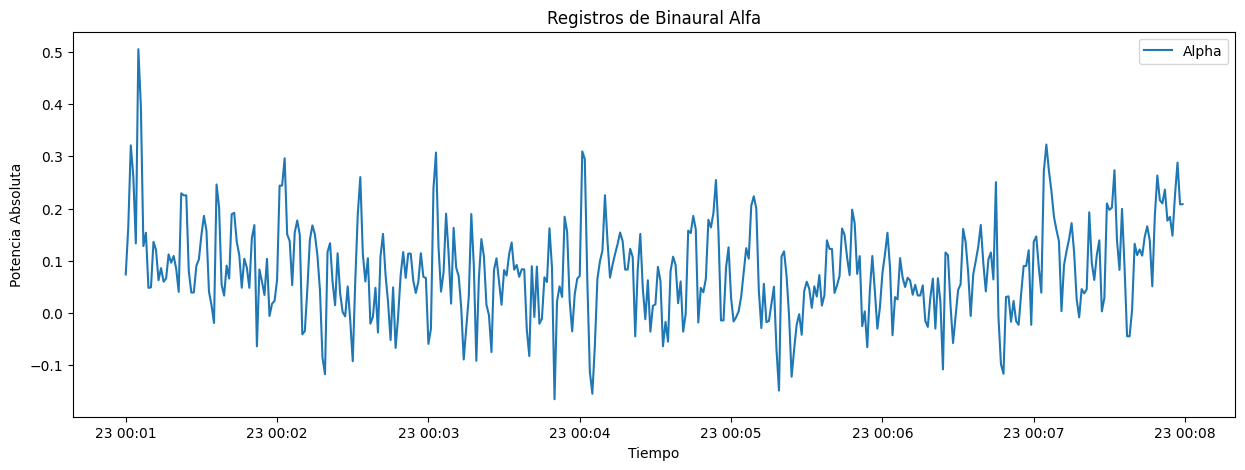

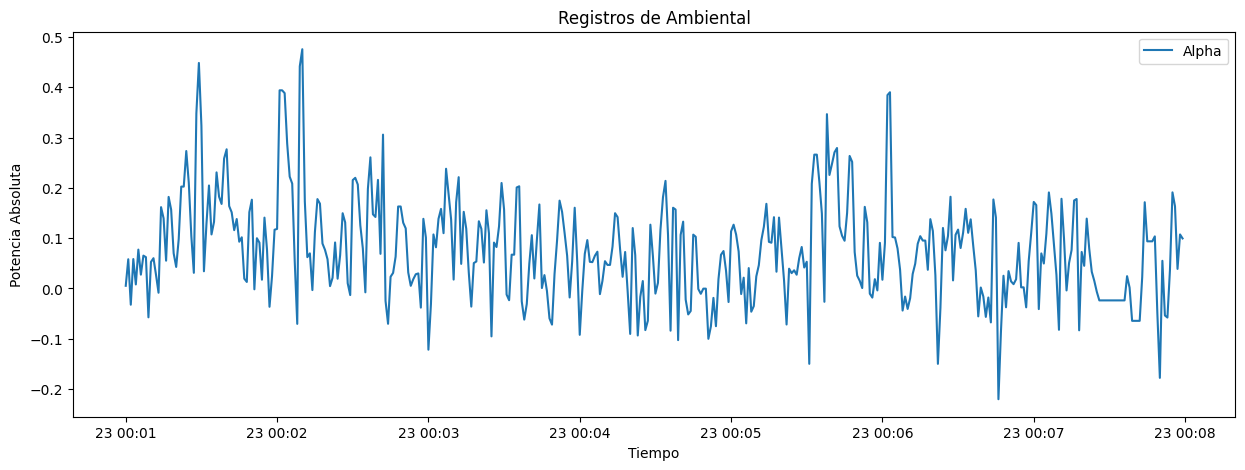

In [ ]:
band_columns = [ 'Theta', 'Alpha', 'Beta']
band_columns = [ 'Alpha']
for i, df in enumerate(dfs):
  plt.figure(figsize=(15, 5))
  for wave in band_columns:
    sns.lineplot(x=df.index, y=df[wave], data=df, label=wave)

  plt.title('Registros de ' + dfs_labels[i])
  plt.xlabel('Tiempo')
  plt.ylabel('Potencia Absoluta')
  plt.legend()
  plt.show()

# Analisis de Datos - Grupos

## Lectura de Datos Individuales


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

ruta = '/content/drive/MyDrive/LAYDI VIVIANA/LAYDIHACKS/[Estudios] Master en Análisis de Datos/TFM/Muse/datos/EEG/'

archivo_excel = ruta + 'base-datos-eeg.gsheet'

worksheet = gc.open(archivo_excel).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)



SpreadsheetNotFound: ignored

In [ ]:
# Ruta al archivo de Excel en Google Drive


gc = gspread.authorize(GoogleCredentials.get_application_default())

# Lee el archivo de Excel con varias hojas
# El argumento sheet_name=None significa que se leerán todas las hojas en un diccionario
hoja_de_calculo = gc.open(archivo_excel)